#Project 1. Create a tree bloom classifier to distinguish cherry-like blooms.

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
%cd '/content/drive/MyDrive/Colab Notebooks/fastai_projects/tree_bloom'
# %mkdir projects

/content/drive/MyDrive/Colab Notebooks/fastai_projects/tree_bloom


In [2]:
# ! pip install fastai2
! pip install utils
from utils import *

In [3]:
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [4]:
from fastai.vision.all import *

In [5]:
from fastai.vision.widgets import *
#from fastai import *

#first create bloom dataset

In [ ]:
# key = os.environ.get('AZURE_SEARCH_KEY', 'XXX')

In [ ]:
search_images_bing

In [ ]:
# results = search_images_bing(key, 'cherry flower blooom')
# ims = results.attrgot('content_url')
# len(ims)

In [7]:
class_col = ['cherry', 'crabapple', 'pear']
class_col

path = Path('data')

In [ ]:
# if not path.exists():
#     path.mkdir()
#     for o in class_col:
#         dest = (path/o)
#         dest.mkdir(exist_ok=True)
#         results = search_images_bing(key, f'{o} flower bloom')
#         download_images(dest, urls=results.attrgot('content_url'))

In [8]:
fns = get_image_files(path)
fns

(#759) [Path('data/cherry/00000201.jpg'),Path('data/cherry/00000200.jpg'),Path('data/cherry/00000204.jpg'),Path('data/cherry/00000205.jpg'),Path('data/cherry/00000203.jpg'),Path('data/cherry/00000206.jpg'),Path('data/cherry/00000202.jpg'),Path('data/cherry/00000207.jpg'),Path('data/cherry/00000208.jpg'),Path('data/cherry/00000212.jpg')...]

In [9]:
failed = verify_images(fns)
failed

(#0) []

In [10]:
failed.map(Path.unlink);

# Now we can create a databunch, and explore the data we downloaded

In [ ]:
# tfms = get_transforms(do_flip=True)
# doc(get_transforms)

In [71]:
bloom = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [72]:
dls = bloom.dataloaders(path)

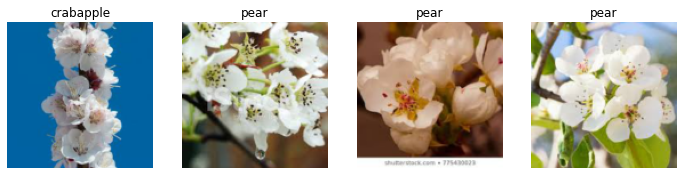

In [73]:
dls.valid.show_batch(max_n=4, nrows=1)

# add data augenmentation in the data and re-create data loader

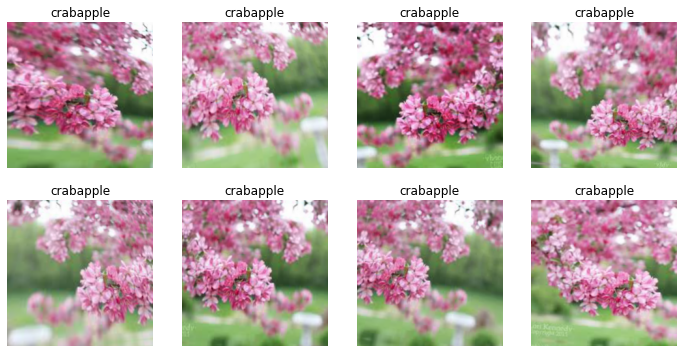

In [74]:
bloom = bloom.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bloom.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

#Train model

In [75]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [76]:
learn

In [78]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.248663,1.356700,0.344371,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.213117,1.334588,0.311258,00:04
1,0.207871,1.699565,0.337748,00:04
2,0.172877,1.853770,0.397351,00:04
3,0.159117,1.803354,0.377483,00:04
4,0.141195,1.838921,0.384106,00:04


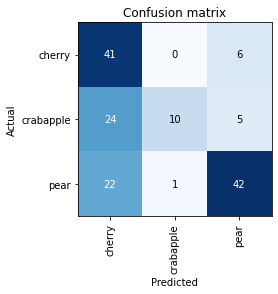

In [79]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

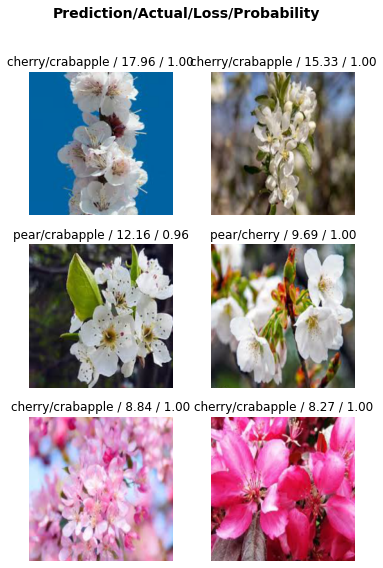

In [80]:
interp.plot_top_losses(6, nrows=3)

In [81]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [83]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [84]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

now can check the learning rate in the fine-tune step.

# Export model

In [85]:
learn.export( fname= 'bloom_v2.pkl')

In [86]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('bloom_v2.pkl')]

In [87]:
learn_inf = load_learner(path/'bloom_v2.pkl')

#check results

In [103]:
btn_upload = widgets.FileUpload()
# btn_upload

In [ ]:
# img = PILImage.create(btn_upload.data[-1])

In [104]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
# out_pl

In [105]:
pred,pred_idx,probs = learn_inf.predict(img)

In [106]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
# lbl_pred

In [107]:
btn_run = widgets.Button(description='Classify')
# btn_run

In [108]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [109]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [110]:
VBox([widgets.Label('Select your bloom!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [111]:
#hide
# !pip install voila
# !jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 2.5MB 19.8MB/s 
     |████████████████████████████████| 552kB 50.1MB/s 
     |████████████████████████████████| 245kB 53.7MB/s 
     |████████████████████████████████| 112kB 61.4MB/s 
     |████████████████████████████████| 430kB 49.3MB/s 
     |████████████████████████████████| 71kB 11.5MB/s 
ERROR: google-colab 1.0.0 has requirement tornado~=5.1.0; python_version >= "3.0", but you'll have tornado 6.1 which is incompatible.
  Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
  Found existing installation: tornado 5.1.1
    Uninstalling tornado-5.1.1:
      Successfully uninstalled tornado-5.1.1
  Found existing installation: jupyter-client 5.3.5
    Uninstalling jupyter-client-5.3.5:
      Successfully uninstalled jupyter-client-5.3.5


Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
Error loading server extension voila
      X is voila importable?
